<a href="https://colab.research.google.com/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



<h1>The Used Cars Dataset Modelling</h1>

###Jashneet Kaur
###jks888@uregina.ca, Id 200380410
###University of Regina
###Spring / Summer 2019


## INRTRODUCTION

###Scikit Algorithm 
I have an option of two scikit algorithms from the figure provided in the assignment. I can select any one from the two algorithms, either Lasso or ElasticNet.

###Process and Justification
I have started to look for the algorithm from the provided figure itself. I have traced the figure with my requirements with the following steps:
####1: started and I have more than 50 dataset values
####2: I am not predicting a category. I am working on to predict a quantity that is I am analysing the statics of car pricing factors.
####3: I have less than 100k data set values so i move further in that direction from the figure.
####4: Now a few features are important to predict the car price like its transmission, odometer value, make and year of manufacturing. 
####5: Hence I have ended with two options of algorithm to use, these are
  #####   Lasso
  ##### . ElastcNet
  
Because i am working on to make predictions of price of a used car with datasets greater than 50 but less than 100k so the chosen algorithm is the best fit. I am not going to predict teh category or teh general structure from my dataset values, hence the above chosen algorithms are helpful for making the quantity predictions based on a few important features of teh car.

###Algorithm Working


NOTE: Here is a link to the file for better visuals : 
https://nbviewer.jupyter.org/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Dataset.ipynb

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

In [0]:
cd gdrive/My Drive

In [0]:
#Importing teh require d libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# ALGORITHM APPLICATION

###Implementation

####Model Creation .

####Data Preperation

In [0]:
#read the file data into a ledger variable
ledger = pd.read_csv('CarList.csv') 

**********************************************************************************************

In [0]:
#get the total number of rows and columns
ledger.shape

(547764, 22)

In [0]:
ledger.size

12050808

In [0]:
#delete the columns
del ledger["url"]
del ledger["city_url"]
del ledger["VIN"]
del ledger["image_url"]
del ledger["condition"]

In [0]:
#I have used the dropna command for all the rows where even any one column value is missing.
ledger = ledger.dropna()

In [0]:
#delete the rows where year < 1960 and price < 200 
ledger.drop(ledger[ledger.price < 200].index, inplace = True)

In [0]:
ledger.drop(ledger[ledger.year < 1960].index, inplace = True)

In [0]:
#sorted the listings by the year of manufacture in descending order
ledger.sort_values(["year"], ascending=False, inplace=True)

In [0]:
ledger = ledger.reset_index(drop=True)

In [0]:
ledger.count()

city            109418
price           109418
year            109418
manufacturer    109418
make            109418
cylinders       109418
fuel            109418
odometer        109418
title_status    109418
transmission    109418
drive           109418
size            109418
type            109418
paint_color     109418
desc            109418
lat             109418
long            109418
dtype: int64

# VISUALIZATION

####Data Visualization

####Labelling 

####Data Plottignl

####Regression r-squared values


In [0]:
ledger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109418 entries, 0 to 109417
Data columns (total 17 columns):
city            109418 non-null object
price           109418 non-null int64
year            109418 non-null float64
manufacturer    109418 non-null object
make            109418 non-null object
cylinders       109418 non-null object
fuel            109418 non-null object
odometer        109418 non-null float64
title_status    109418 non-null object
transmission    109418 non-null object
drive           109418 non-null object
size            109418 non-null object
type            109418 non-null object
paint_color     109418 non-null object
desc            109418 non-null object
lat             109418 non-null float64
long            109418 non-null float64
dtypes: float64(4), int64(1), object(12)
memory usage: 14.2+ MB


In [0]:
ledger.ndim

2

In [0]:
ledger.head(5)

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,desc,lat,long
0,"austin, TX",10950,2020.0,toyota,corolla,4 cylinders,gas,6120.0,salvage,automatic,fwd,compact,sedan,blue,Elite Motor Cars of MiamiAsk for: EdgarâÂ (7...,25.827103,-80.241520
1,"panama city, FL",46900,2020.0,jeep,gladiator,6 cylinders,gas,8.0,clean,automatic,4wd,mid-size,SUV,red,NEW JEEP GLADIATOR...Sport Model..Automatic an...,30.175202,-85.667038
2,"rochester, MN",68600,2020.0,toyota,supra,6 cylinders,gas,0.0,clean,automatic,rwd,mid-size,coupe,red,Red Supra - Launch Edition - One of 1500 Limit...,44.046267,-91.674145
3,ventura county,270,2019.0,jeep,cherokee latitude sport,4 cylinders,gas,4500.0,clean,automatic,fwd,mid-size,SUV,black,Lease transfer on a 2019 Jeep Cherokee w/ leat...,34.263482,-118.905344
4,"green bay, WI",69480,2019.0,ford,expedition,6 cylinders,gas,4233.0,clean,automatic,4wd,full-size,SUV,grey,2019 Ford Expedition Limited - Stone Gray\n\n\...,44.520390,-88.066450


In [0]:
ledger.tail(5)

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,desc,lat,long
109413,new york city,30000,1960.0,chevrolet,bel air,8 cylinders,gas,638.0,clean,automatic,rwd,full-size,coupe,red,Must see over 75k spent in rebuild over two ye...,40.674429,-73.393053
109414,"st cloud, MN",15900,1960.0,ford,f100 pick up,8 cylinders,gas,61000.0,clean,manual,rwd,full-size,pickup,grey,"UP FOR SALE, 1960 FORD F100, NUMBERS MATCHING,...",45.810700,-94.832100
109415,"hartford, CT",50000,1960.0,chevrolet,corvette,8 cylinders,gas,62000.0,clean,manual,rwd,mid-size,convertible,red,New tires\nNew rugs\n62000 miles \nTotal overh...,41.585200,-72.612800
109416,san luis obispo,3500,1960.0,ford,thunderbird,8 cylinders,gas,5000.0,clean,automatic,fwd,full-size,coupe,silver,Newer 390 fe motor installed. Has approximatel...,35.615720,-120.669079
109417,"winchester, VA",40000,1960.0,pontiac,bonneville convertible,8 cylinders,gas,94101.0,clean,automatic,rwd,full-size,convertible,custom,"Fully restored in 2006. New paint, new upholst...",38.911300,-77.967400


In [0]:
ledger.describe()

,price,year,odometer,lat,long
count,1.094180e+05,109418.000000,1.094180e+05,109418.000000,109418.000000
mean,9.333188e+04,2007.930569,1.191248e+05,38.510519,-92.013388
std,1.648350e+07,7.760470,1.315943e+05,5.596388,16.251720
min,2.000000e+02,1960.000000,0.000000e+00,-82.890831,-161.874900
25%,4.650000e+03,2005.000000,6.977400e+04,34.926700,-97.951800
50%,8.900000e+03,2009.000000,1.123220e+05,39.363221,-86.875248
75%,1.590000e+04,2013.000000,1.552140e+05,42.477134,-80.396200
max,4.045085e+09,2020.000000,1.000000e+07,68.582997,8.899454


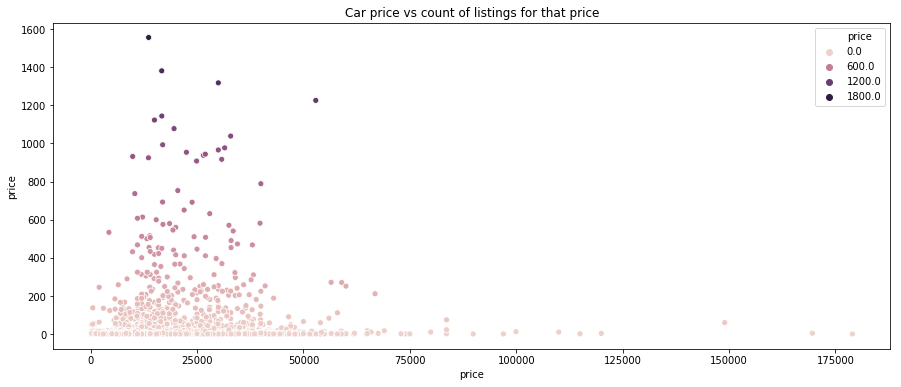

In [0]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="price", y=ledger['price'].value_counts(), hue=ledger['price'].value_counts(), data=ledger)
plt.title("Car price vs count of listings for that price");

The scatter plot shows that there are a few price listings which are outliers. these values are stretching the plotted graph. Let us explore these outliers. Checking the rows with price greater than 1,25,000. (Chris, 2017)

In [0]:
highprice = np.where(ledger["price"]>125000)
highprice

(array([   524,   1998,   2016,   2074,   3144,   4400,   5303,   9769,
         10366,  15323,  15775,  17513,  26667,  33948,  34055,  38068,
         38877,  39421,  40166,  48931,  49411,  51743,  52765,  59634,
         65269, 103710, 108614]),)

In [0]:
ledger.loc[highprice]

,city,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,desc,lat,long
524,"treasure coast, FL",145000,2018.0,dodge,challenger,8 cylinders,gas,5.0,clean,automatic,rwd,mid-size,coupe,yellow,"2018 Dodge Challenger SRT Demon - $145,000\nYe...",27.176336,-80.240442
1998,fort collins / north CO,33999,2018.0,ford,explorer,6 cylinders,gas,30841.0,clean,automatic,4wd,mid-size,SUV,custom,Use this link to see more information on this ...,39.580309,-104.954917
2016,"corpus christi, TX",20901,2018.0,honda,accord,4 cylinders,gas,13683.0,clean,automatic,fwd,mid-size,sedan,red,Use this link to see more information on this ...,27.657870,-97.479816
2074,"upper peninsula, MI",22500,2018.0,jeep,compass trailhawk,4 cylinders,gas,28000.0,lien,automatic,4wd,compact,SUV,red,"I am the second owner, purchased only two mont...",45.679200,-87.531900
3144,norfolk / hampton roads,31744,2018.0,nissan,nv3500 high roof cargo,8 cylinders,gas,11856.0,clean,automatic,rwd,full-size,van,white,2018 Nissan NV3500-SV-High Roof-Cargo Van-5.6L...,36.688290,-76.230521
4400,"mobile, AL",18502,2017.0,honda,accord,4 cylinders,gas,34296.0,clean,automatic,fwd,mid-size,sedan,blue,SOLD!!! \nThis Honda Accord has just been Sol...,30.668786,-88.105874
5303,grand forks,15990,2017.0,chevrolet,cruze,4 cylinders,gas,21858.0,clean,automatic,fwd,full-size,sedan,white,2017 Chevrolet Cruze\nLT Pkg.\n1.4L A/T\nLow m...,47.911024,-97.045022
9769,scranton / wilkes-barre,26995,2016.0,ford,super duty f-350 srw,8 cylinders,diesel,121089.0,clean,automatic,4wd,full-size,pickup,white,2016 *** Ford Super Duty F-350_ F350_ f350_ FÂ...,43.488300,-76.393469
10366,"phoenix, AZ",10892,2016.0,kia,optima,4 cylinders,gas,75569.0,clean,automatic,fwd,full-size,sedan,grey,2016 **Kia Optima** LX\n\nAvailable at: Mark M...,33.639590,-112.042000
15323,"cleveland, OH",19999,2015.0,chevrolet,colorado,6 cylinders,gas,59915.0,clean,automatic,4wd,mid-size,pickup,black,Call (or text) â (440) 815â1794\nWE TAKE A...,41.575218,-81.551502


In [0]:
ledger.drop(ledger[ledger.price > 125000].index, inplace = True)

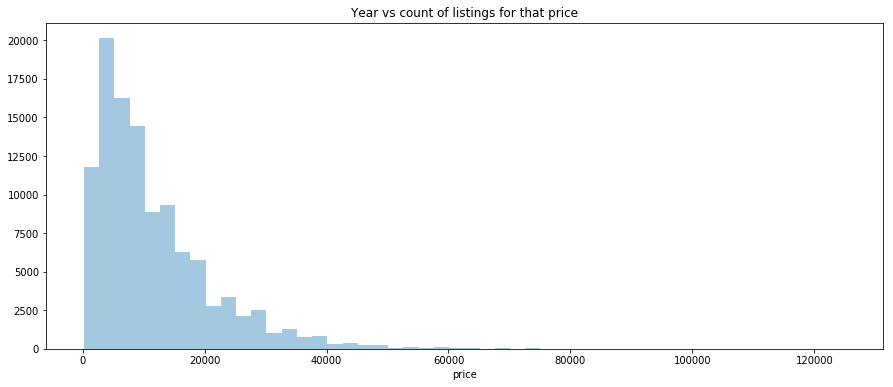

In [0]:
plt.figure(figsize=(15,6))
ax = sns.distplot(ledger['price'],kde = False)
plt.title("Year vs count of listings for that price");

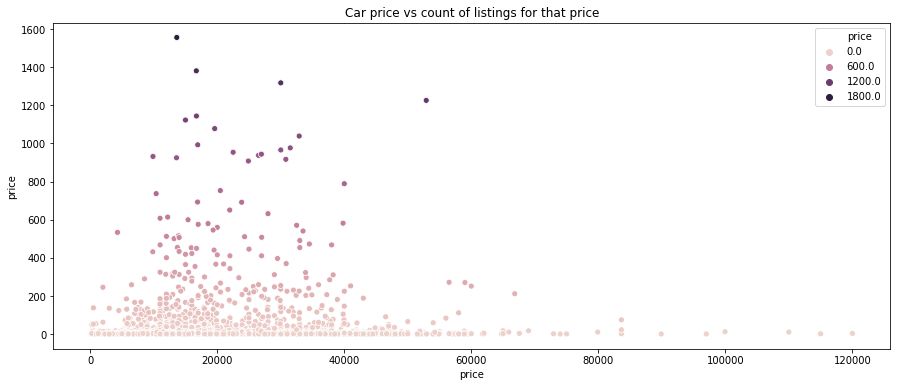

In [0]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="price", y=ledger['price'].value_counts(), hue=ledger['price'].value_counts(), data=ledger)
plt.title("Car price vs count of listings for that price");

# DISCUSSION

####Model Implications

####Fictional Instance

####Potential accuracy in interpolation and extrapolration

# SUMMARY

####Conclusion

####Future Aspects

####Knowledge gathered

# REFERENCES

Austin Reese (2019) "Used Cars Dataset" Vehicles listings from Craigslist.org. Available at: https://www.kaggle.com/austinreese/craigslist-carstrucks-data/version/7.


Tomesh, T. (2019). titanic.ipynb. Available at: https://colab.research.google.com/drive/1KftGp4lGzd7PJuKWq9qDv3xnxiQbwhwY#scrollTo=Y2tOGJ2UYPVi [Accessed 16 Aug. 2019].


Stach Overflow (2019) Available at https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame [Accessed 17 Aug 2019]


TutorialsPoint (2019 )Available at https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.html [Accessed 18 Aug 2019]


Chris ALbon (2017), "Using Seaborn To Visualize A pandas Dataframe"  Available at: https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/  [Accessed 18 Aug 2019]